In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2
from astroquery.gaia import Gaia

## Step 1: produce the dataframe with both LAMOST and Gaia radial velocities

In [74]:
df = pd.read_csv('Data/dr9_v2.0_MRS_stellar.csv')
df_candidates = pd.read_csv('Data/Results/sample_candidates.csv')

In [75]:
candidates_list = df_candidates["designation"]
candidates_list = [item.removeprefix("LAMOST ") for item in candidates_list]
LAMOST_Gaia_df = df[df["designation"].isin(candidates_list)]

### Substep: Retrieve Gaia radial velocities
Generate a file with list of gaia source ids and download the observations from https://gea.esac.esa.int/archive/

In [76]:
Gaia_id = [str(x) for x in LAMOST_Gaia_df['gaia_source_id'].tolist()]

with open('Data/candidates_Gaia_id', 'w') as file1:
    for item in Gaia_id:
        file1.write(f"Gaia DR3 {item}\n")

Save the csv file into Data folder and named it Gaia_RV.csv

In [93]:
#Filter out the sample df to only contain Designation, obsID & RV
df_sample = LAMOST_Gaia_df[['designation', 'gaia_source_id', 'rv_br1', 'rv_br1_err']]
df_sample = df_sample.rename(columns={'rv_br1': 'radial_velocity', 'rv_br1_err': 'radial_velocity_error'})

In [94]:
df_sample

,designation,gaia_source_id,radial_velocity,radial_velocity_error
15054,J162004.94+474226.6,1411047497204283136,-54.89,1.86
34499,J133254.30+331234.4,1469150089663983616,-189.99,1.11
35118,J121045.02+255753.9,4003466319432518784,-133.95,1.56
36420,J145058.84+144308.9,1185415204239644800,-27.75,1.44
38162,J011337.70+555512.1,411740480110577920,-24.25,0.54
...,...,...,...,...
1599964,J032724.68+504105.5,441884205555670656,-2.19,1.59
1604358,J032724.68+504105.5,441884205555670656,-2.50,1.66
1660594,J152833.89+452012.1,1394778676483156224,-201.93,0.91
1674954,J005251.44+104310.4,2582612905086733568,-9.61,2.24


In [95]:
#read the df with Gaia radial velocity and add designation to it
df_Gaia = pd.read_csv('Data/Gaia_RV.csv')
df_Gaia = df_Gaia.rename(columns={'source_id': 'gaia_source_id'})
df_Gaia = df_Gaia[['gaia_source_id', 'radial_velocity', 'radial_velocity_error', 'ruwe']]
id2desig = dict(zip(df_sample['gaia_source_id'], df_sample['designation']))
df_Gaia['designation'] = df_Gaia['gaia_source_id'].map(id2desig)
df_sample = df_sample[['designation', 'radial_velocity', 'radial_velocity_error']]
df_Gaia_1 = df_Gaia[['designation', 'radial_velocity', 'radial_velocity_error']]

# concat these two
df_RVs = pd.concat([df_sample, df_Gaia_1], ignore_index = True).dropna()

In [96]:
df_Gaia.dropna()

,gaia_source_id,radial_velocity,radial_velocity_error,ruwe,designation
1,1115628342232842368,-335.433500,2.265624,3.915628,J065401.91+752725.9
2,1185415204239644800,-19.917337,6.040482,1.026602,J145058.84+144308.9
3,1205409410874586112,19.141792,2.763834,0.984457,J161256.17+214838.3
6,1268601780096418048,11.500155,9.566756,1.003781,J150857.80+274632.7
7,1275559008641926400,1.644078,1.923294,0.970460,J151804.63+303904.1
...,...,...,...,...,...
343,775836260920178048,-135.386350,2.125786,0.960785,J104517.86+375738.2
344,775836260920178048,-135.386350,2.125786,0.960785,J104517.86+375738.2
345,775836260920178048,-135.386350,2.125786,0.960785,J104517.86+375738.2
354,845404358769878912,50.204000,3.269991,0.945633,J115118.70+575757.7


## Step 2: Calculate the chi2 of each radial velocity

J000045.08+062941.8
-160.15416499999998
-175.64 1.15
-144.66833 2.2442682
1.0130744372312786e-51


J000054.12+000557.2
-17.5182815
-14.86 2.62
-20.176563 4.7442393
0.2464366684161765


J000556.86-012835.5
-112.93658500000001
-117.47 1.01
-108.40317 1.5028275
6.372412017079379e-08


J000931.30-005813.9
47.4
47.4 2.36
nan


J001000.34+082825.2
-267.91
-267.91 1.52
nan


J001313.71+033337.6
-164.461765
-164.93 1.6
-163.99353 4.4614196
0.7558787107640708


J001817.37+342048.9
-234.37
-234.37 1.74
nan


J002215.33+225708.2
-133.45
-133.45 1.4
nan


J005251.44+104310.4
127.04051075
536.51 2.39
-9.61 2.24
-9.3689785 2.877024
-9.3689785 2.877024
0.0


J011337.70+555512.1
-23.927380499999998
-24.25 0.54
-23.604761 0.5409196
0.39856054437704425


J015319.05+375905.4
6.887219
8.13 1.61
5.644438 2.7237787
0.36989004362158406


J030510.87+544526.9
9.99148715
15.13 3.46
12.93 3.52
8.79 2.44
12.4 2.28
12.24 3.22
14.14 3.53
13.76 3.23
13.69 2.63
7.0979743 2.5366046
7.0979743 2.5366046
7.0979743 2.5366

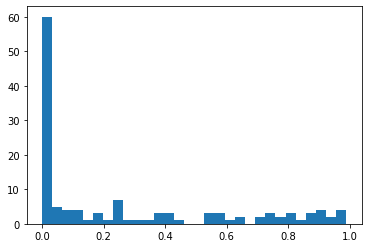

In [97]:
#Construct a dataframe with designation and mean radial velocities
df_mean = df_RVs.groupby('designation').mean('radial_velocity').reset_index()
Mean = df_mean['radial_velocity']

#Calculate the chi2 for each radial velocity
result = []
n_desig = df_mean['designation'].to_list() #number of designations (stars)
for i in range(len(n_desig)):
    desig = df_mean['designation'][i]
    print(desig)
    df_desig = df_RVs[df_RVs['designation'] == desig]
    n_obs = len(df_desig['designation'].tolist())
    mean = Mean.iloc[i]
    print(mean)
    f_exp = mean
    f_obs = np.zeros(1)
    f_err = np.zeros(1)
    for j in range(n_obs):
        RV = df_desig.iloc[j]['radial_velocity']
        RV_error = df_desig.iloc[j]['radial_velocity_error']
        f_obs = np.append(f_obs, RV)
        f_err = np.append(f_err, RV_error)  
        print(RV,RV_error)
    chi_square_statistic = np.sum(((f_obs[1:n_obs+1] - f_exp) / f_err[1:n_obs+1]) ** 2)
    degrees_of_freedom = n_obs - 1
    p = chi2.sf(chi_square_statistic, degrees_of_freedom)
    print(p)
    print('\n')
    result.append([desig, p])

df_chi2 = pd.DataFrame(result, columns=['designation', 'p-value'])
plt.hist(df_chi2['p-value'], bins=30)
candidates = df_chi2[df_chi2['p-value'] < 0.01]['designation'].tolist()

,Designation,radial_velocity,radial_velocity_error
70,J120717.22+485644.6,6.2200,2.700000
133,J120717.22+485644.6,25.3783,4.470786


In [98]:
df_candidates_Gaia = df_Gaia[df_Gaia['designation'].isin(candidates)][['designation', 'ruwe']]
df_candidates = pd.merge(df_candidates_Gaia, df_chi2, on = 'designation')
# df_candidates.to_excel('/Users/mac/Desktop/table.xlsx')

In [101]:
df_candidates[(df_candidates['ruwe'] > 1.2) & (df_candidates['p-value'] < 0.05) & (df_candidates['designation'] != 'J044627.62+251153.5')]

,designation,ruwe,p-value
0,J065401.91+752725.9,3.915628,3.574110e-18
60,J150102.52+564015.6,1.932914,2.173080e-03
61,J150102.52+564015.6,1.932914,2.173080e-03
63,J000556.86-012835.5,1.223657,6.372412e-08
66,J000045.08+062941.8,1.318706,1.013074e-51
79,J062833.19-064544.1,4.351231,2.669190e-05
80,J042013.23+115203.0,1.401366,8.956666e-04
115,J034013.85+581027.7,4.936545,2.099186e-04
123,J101649.59+172001.8,1.327533,3.095612e-03
